# Diabetes Project

### Question 1. Can BMI be predicted using all the other variables in the dataset? What are the relationships between our predictor variables and BMI? Which variable has the largest effect on BMI? Will this model accurately predict BMI in other similar datasets?

### Question 2. Can Diabetes (measured in the `Outcome` column, 0 indicates no diabetes, 1 indicates diabetes diagnosis) be predicted using all the other variables in the dataset? What are the relationships between our predictor variables and diabetes? Which variable has the largest effect on Diabetes diagnosis? Will this model accurately predict Diabetes in other similar datasets?

In [1]:
# import the necessary packages
import warnings
warnings.filterwarnings('ignore')


import math as math
import pandas as pd
import numpy as np
from plotnine import *
# Linear Regression Model
from sklearn.linear_model import LinearRegression 
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
#Z-score variables
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
# simple TT split cv
from sklearn.model_selection import train_test_split 
#k-fold cv
from sklearn.model_selection import KFold 
 #LOO cv
from sklearn.model_selection import LeaveOneOut
# cross validation metrics
from sklearn.model_selection import cross_val_score 
# cross validation metrics
from sklearn.model_selection import cross_val_predict 

## Question 1

In [125]:
# Download data set
diabetes = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/diabetes2.csv"
diabetes_DF = pd.read_csv(diabetes)

In [126]:
np.random.seed(100)
#Predictors 
predictors = ["SkinThickness","BloodPressure","Outcome", "Insulin", "Glucose","Age", "DiabetesPedigreeFunction", "Pregnancies"]
X = diabetes_DF[predictors]
Y = diabetes_DF["BMI"]
# Leave One OUT
loo = LeaveOneOut()

#Linear Regression model
lr = LinearRegression()

# empty list to store mean squared error & r2 for each fold &predicted BMI

mse = []
r2 = []
predicted_BMI = []
actual_value = []
for train, test in loo.split(X):
    # Get train/test for this fold 
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    Y_train = Y.iloc[train]
    Y_test = Y.iloc[test]
    
    continuous = ["SkinThickness","BloodPressure", "Insulin", "Glucose","Age", "Pregnancies", "DiabetesPedigreeFunction"]
    # Fit Zscore only on training data (no data leakage)
    zscore = StandardScaler()
    zscore.fit(X_train[continuous])

    #Zscore both train / test
    X_train[continuous] = zscore.transform(X_train[continuous])
    X_test[continuous] = zscore.transform(X_test[continuous])

    # Fit model
    model = lr.fit(X_train, Y_train)
    #record predictors & actual value 
    predicted_BMI.append(model.predict(X_test)[0])
    actual_value.append(Y_test)
    #record accuracy
    mse.append(mean_squared_error(Y_test, model.predict(X_test)))
    



### Explanation of chosen model//variables/z-score/model validation: 

Since BMI is a continuous variable I chose to do a linear regression model. Since the the public health company wanted to know if all the variables could be used to predict BMI, I chose to include all of the variables in my model. I used zscores to put all the continuous variables (all except Outcome) on the same scale which would allow my model to converge faster and would allow me to compare my variables on the same level to determine which variable had a stronger relationship with BMI. The reason why I didn't z-score Outcome is because it is a categorical variable where  1&0 represent if the person is diabetic or not.  The way I chose to validate my model was using Leave One Out Cross Validation (LOO) because it should provide the most accuracy of how well my model is able to predict someone's BMI with the provided predictor variables. This method provides the most accuracy because it is using the whole data set and using each data point as the test variable once while the rest of the data points are used to train the model. While LOO can be computationally expensive and take more time to compute, I chose to use LOO as my validaton method because I had a fairly reasonable sized data set and enough time to work on it. 

In [127]:
#Accuracy of prediction using Mean Squared Error & R2
mse = np.mean(mse)
r2 = r2_score(actual_value, predicted_BMI)
print(mse)
print(r2)

46.86635285699331
0.24505359673336513


### Interpretation of Model Performance & Justification for Model Performance Choice

To evaluate this model's performance, I first calculated the mean squared error to measure how well the model is performing. The mean squared error takes the sum of all the squared error for all the data points and divides it by the number of data points to produce the average of how much square error per data point. Since we are measuring BMI that means that there is an average error of approximately 6.84590 per data point (square root of 46.86635285699331), which in this context is fairly high. For instance, often times BMI is used to put people into weight categories (Underweight, Healthy, Overweight, etc.) and with our model has an 6.84590 error then we could predicting that someone is in a completely different weight category which could be extremely detrimental to the persons health. For example, if someone is healthy based on their BMI but because of our model errors you are telling them that they are underweight or overweight based on their based on their BMI. Then they could be doing things to gain weight or lose weight when in reality they were a healthy weight. 

To further evaluate the accuracy of the model, I used R2 because it is a standardized score that can be compared across various model by explaining the percentage of variation explained by the model . The more variation the model explains the better it is performing (the closer it is to 100%). This model's R2 was 24.505359673336513% which means that the model is only doing roughly 25% better at predicting the BMI compared to if we simply predicted the mean.    

In [128]:
# New Model
lr2 = LinearRegression()
predictors = ["SkinThickness","BloodPressure","Outcome", "Insulin", "Glucose","Age", "DiabetesPedigreeFunction", "Pregnancies"]
X = diabetes_DF[predictors] 
continuous = ["SkinThickness","BloodPressure", "Insulin", "Glucose","Age", "Pregnancies", "DiabetesPedigreeFunction"]
Y = diabetes_DF["BMI"]

# Fit zscore
zscore = StandardScaler()
zscore.fit(X[continuous])

#Zscore x
X[continuous] = zscore.transform(X[continuous])

#Fit model
lr2 = lr2.fit(X, Y)

In [129]:
# Coefficients 
coef = pd.DataFrame({"Coefs" : lr2.coef_, "Names" : predictors})
coef = coef.append({"Coefs": lr2.intercept_, "Names" : "intercept"}, ignore_index = True)
coef

,Coefs,Names
0,2.610061,SkinThickness
1,1.575305,BloodPressure
2,3.801725,Outcome
3,-0.244559,Insulin
4,0.666813,Glucose
5,-0.309745,Age
6,0.205419,DiabetesPedigreeFunction
7,-0.200975,Pregnancies
8,30.665934,intercept


### Interpretations of the coefficents for each model: 
* A one standard deviation increase in Skin Thickness leads to a 2.610061 unit increase in BMI. 
* A one standard deviation increase in Blood Pressure leads to a 1.575305 unit increase in BMI. 
* If someone is diabetic we excpect BMI to be 3.801725 units more than someone who is not diabetic. 
* A one standard deviation increase in Insulin leads to a 0.244559 unit decrease in BMI. 
* A one standard deviation increase in Glucose leads to a 0.666813 unit increase in BMI. 
* A one standard deviation increase in Age leads to a 0.309745 unit decrease in BMI. 
* A one standard deviation increase in Diabetes Pedigree Function leads to a 0.205419 unit increase in BMI. 
* A one standard deviation increase in Pregnancies leads to a 0.200975 unit decrease in BMI.
* When all the predictors are 0 (skin thickness, blood pressure, insulin, glucose, age, diabetes pedigree function, pregnancies & not diabetic), we expect someone's BMI to be 30.666821 units. 

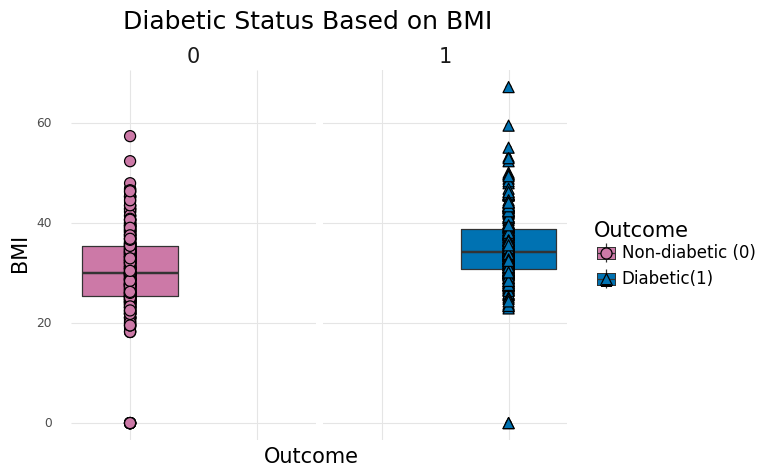

<ggplot: (8761571260829)>

In [143]:
#Visualization 1

(ggplot(diabetes_DF, aes(x = "Outcome", y = "BMI", fill = "factor(Outcome)"))+
geom_boxplot()+
geom_point(aes(shape = "factor(Outcome)"), size = 4)+
facet_wrap("~Outcome")+
scale_x_continuous(breaks = [min(diabetes_DF.Outcome), max(diabetes_DF.Outcome)]) +
ggtitle("Diabetic Status Based on BMI ") +
theme_minimal()+
theme(panel_grid_minor_y = element_blank(),
panel_grid_minor_x =element_blank(),
axis_title = element_text(size =15),
strip_text_x = element_text(size =15),
plot_title = element_text(size =18),
axis_text_x = element_blank(),
legend_title = element_text(size = 15),
legend_text = element_text(size = 12)) +
scale_shape_discrete(values = ["#cc79a7", "#0072b2"], name = "Outcome" ,labels = ("Non-diabetic (0)", "Diabetic(1)"))+
scale_fill_manual(["#cc79a7", "#0072b2"], name ="Outcome", labels = ("Non-diabetic (0)", "Diabetic(1)")))

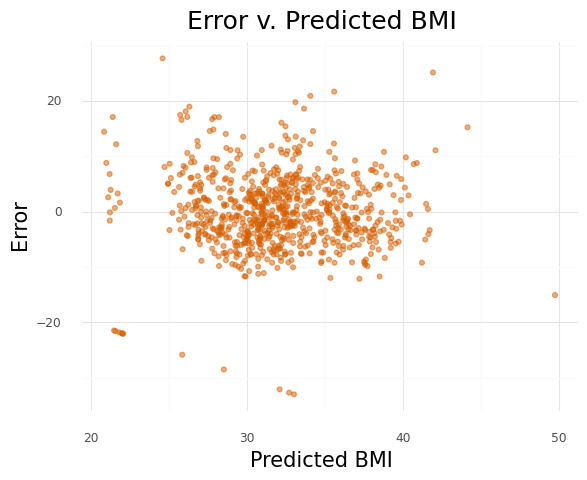

<ggplot: (8761571591309)>

In [98]:
#Visualization 2

#Error v. Predicted BMI 
assumption = pd.DataFrame({"error": Y - predicted_BMI, "predicted": predicted_BMI})

(ggplot(assumption , aes(x = "predicted", y = "error")) + geom_point(alpha = 0.5, color = "#d55e00")+
ggtitle("Error v. Predicted BMI") +
labs(x = "Predicted BMI", y = "Error")+
theme_minimal()+ 
theme(plot_title = element_text(size =18),
axis_title = element_text(size =15)))

## Justification for Visualization Choices

In the first visualization, I chose to further demonstrate the relationship between BMI and the variable that has the largest affect on on which is Outcome with a box plot graph. This graph shows that people who are diabetic have a higher BMI and those who are not tend to have a lower BMI. 

For the second visualizatoin, I also chose to plot the model's error (Predicted outcome- Actual outcome) vs. the BMI the model predicted to visualize the distribution of error and how much it varies. This type of graph also allows us to see if any assumptions of homoscedasticity or normality of errors were violated. Based of of the visual, it shows that overall homoskedaticisty and the normality of errors is not violated because there is a clump of data sets with no clear pattern and is overall evenly distributed/spaced out. Also the number of errors do get smaller as it gets further away from zero. However, there are more outliers when the predicted BMI is lower than around 30. This shows us that we chose the right type of model for this graph and provides a visual for the public health company to see the wide pread of error in the model and understand why the model will not likely predict BMI accurately with other similar data sets. 

 ###  Can BMI be predicted using all the other variables in the dataset? 

Yes, BMI can be predicted using all other variables in the dataset because all of the data is either continuous or binary.

###  What are the relationships between our predictor variables and BMI? 

The predictor variables including Skin Thickness, Blood Pressure, Outcome, Glucose, and Diabetes Pedigree Function have a positive relationship with BMI. This means as these predictors increase, BMI also increases. While the predictors such as Insulin, Age, and Pregnancies have a negative relationship with BMI. This means that as these predictors increase, BMI decreases. 

### Which variable has the largest effect on BMI? 

The outcome if someone has diabetes or not has the highest impact on BMI. This is proven in the model because it has largest coefficient which means it has the largest weight in calculating BMI. If someone is diabetic we excpect BMI to be 3.801725 units more than someone who is not diabetic. This relationship is showed in Visualization #1 where it depicts the relationship between people who are diagnosed as diabetic and those who aren't in relation to their BMI. The visualization shows that people who are diabetic tend to have a higher BMI, while those who are not tend to have a lower BMI. 

###  Will this model accurately predict BMI in other similar datasets?

If we had a similar dataset I would expect that the model would not accurate predict BMI on other datasets because the average amount of error (mean squared error) is fairly high and the R2  of the model is 24.505359673336513% which shows the percentage of variation explained by the model. Since the R2 is fairly low that means it is doing a little bit better than predicting the mean every time. Overall, since the model is not currently very accuarate in predicting BMI with the data we built it on, it will not likely be accurate in predicting BMI on similar datasets. 

## Question 2

In [144]:
np.random.seed(100)
#Predictors 
predictors2 = ["SkinThickness","BloodPressure","BMI", "Insulin", "Glucose","Age", "DiabetesPedigreeFunction", "Pregnancies"]
X2 = diabetes_DF[predictors2]
Y2 = diabetes_DF["Outcome"]
# Leave One OUT
loo2 = LeaveOneOut()

#Logistic Regression model
logit =LogisticRegression()

# empty list to store accuracy, predicted outcome, true values 

acc = []
predicted_Outcome = []
true_value = []
for train, test in loo2.split(X2):
    # Get train/test for this fold 
    X2_train = X2.iloc[train]
    X2_test = X2.iloc[test]
    Y2_train = Y2.iloc[train]
    Y2_test = Y2.iloc[test]
    
    # Fit Zscore only on training data (no data leakage)
    zscore = StandardScaler()
    zscore.fit(X2_train)

    #Zscore both train / test
    X2_train = zscore.transform(X2_train)
    X2_test = zscore.transform(X2_test)

    # Fit model
    model2 = logit.fit(X2_train,Y2_train)
    
    #record accuracy
    acc.append(accuracy_score(Y2_test, model2.predict(X2_test)))
    
    #record actual value 
    true_value.append(Y2_test)
    #record predictors 
    predicted_Outcome.append(model2.predict(X2_test)[0])
    

### Explanation of chosen model//variables/z-score/model validation: 

Since Outcome is a binary categorical variable I chose to use Logistic Regression because it is essentially the same as Linear Regression, the only difference is that logistic regression is used to predict binary categorical variables and linear regression is used to predict continuous variables. Since the public health company wants to know if all variables could be used to create the model I chose to show that you could by using all of them in my model. I z-scored all of the predictor variables since they were all continuous variables. By z-scoring all of the predictors I am able to compare to compare them on similar scales and it will allow my model to converge faster. This is helpul because I did choose the most computationally expensive model validation method. To validate my model, I chose to use Leave One Out (LOO) again since it uses the whole data set in the model (no data is thrown away) by using each data point as the test variable once while the rest of the data points are used to train the model. Since LOO takes uses each data point to test the model and uses the rest of the points to create the model, it provides the most accuracy of how well the model can predict if someone is diabetic or not. While LOO can be computationally expensive and take more time to compute, I chose to use LOO as my validaton method because I had a fairly reasonable sized data set and enough time to work on it. 

In [145]:
accuracy = np.mean(acc)
print(accuracy)
acc_df = pd.DataFrame(acc)

0.7760416666666666


In [146]:
confusion_matrix(true_value, predicted_Outcome)

array([[444,  56],
       [116, 152]])

### Interpretation of Model Performance & Justification for Model Performance Choice

I used the accuracy score to determine the model's performance because it shows the percentage of times that the model accurately predicted if someone was diabetic or not. The accuracy shows that the model is 77.60416666666666% accurate. To understand the model's accuracy more in-depth I did a confusion matrix to see if there are more true positives or true negatives. This will allow me to see i what our model is better at predicting at and analyze if there is anything wrong with the model (ex. any strange patterns). The confusion matrix shows that our model predicts 444/560 true negatives (est. 79.2857%) and 152/208 true positives (est. 73.0769%) which shows our model is a little bit stronger in predicting true negatives compared to true positives. This also shows us that there are no weird patterns in our data set that we should be extremely concerned about.  

In [147]:
# New Model
logit2 = LogisticRegression()
predictors2 = ["SkinThickness","BloodPressure","BMI", "Insulin", "Glucose","Age", "DiabetesPedigreeFunction", "Pregnancies"]
X2 = diabetes_DF[predictors2]
Y2 = diabetes_DF["Outcome"]

# Fit zscore
zscore = StandardScaler()
zscore.fit(X2)

#Zscore x
zscore.transform(X2)

#Fit model
logit2 = logit2.fit(X2,Y2)

In [148]:
coef2 = pd.DataFrame({"Coefs" : logit2.coef_[0], "Names" : predictors2})
coef2 = coef2.append({"Coefs": logit2.intercept_[0], "Names" : "intercept"}, ignore_index = True)
coef2

,Coefs,Names
0,-0.001270,SkinThickness
1,-0.014087,BloodPressure
2,0.077202,BMI
3,-0.001240,Insulin
4,0.033600,Glucose
5,0.010035,Age
6,1.419042,DiabetesPedigreeFunction
7,0.117252,Pregnancies
8,-7.702917,intercept


### Interpretations of the coefficents (log odds): 
I calculated the log odds coefficents to better understand if the relationships between the predicted variables and the outcome were positive or negative. 

* A one standard deviation increase in Skin Thickness is associated in a 0.001270 decrease in the log odds of a person being diabetic. 

* A one standard deviation increase in Blood Pressure is associated in a 0.250785 decrease in the log odds of a person being diabetic. 

* A one standard deviation increase in BMI is associated in a 0.077202 increase in the log odds of a person being diabetic.

* A one standard deviation increase in Insulin is associated in a 0.001240 decrease in the log odds of a person being diabetic. 

* A one standard deviation increase in Glucose is associated in a 0.033600 increase in the log odds of a person being diabetic. 

* A one standard deviation increase in Age is associated in a 0.010035 increase in the log odds of a person being diabetic.

* A one standard deviation increase in Diabetes Pedigree Function is associated in a 1.419042 increase in the log odds of a person being diabetic.

* A one standard deviation increase in Pregnancies is associated in a 0.117252 increase in the log odds of a person being diabetic.

* When all predictor variables are 0 the log odds is -7.702917. 

In [149]:
# To make the coefficients more easy to interpret we convert log odds to odds
#Odds
coef2["Odds Coefs"] = np.exp(coef2["Coefs"])
coef2

,Coefs,Names,Odds Coefs
0,-0.001270,SkinThickness,0.998730
1,-0.014087,BloodPressure,0.986011
2,0.077202,BMI,1.080261
3,-0.001240,Insulin,0.998760
4,0.033600,Glucose,1.034171
5,0.010035,Age,1.010086
6,1.419042,DiabetesPedigreeFunction,4.133158
7,0.117252,Pregnancies,1.124403
8,-7.702917,intercept,0.000452


### Interpretations of the coefficents (odds): 
However, log odds aren't as easily understood by non data scientist which is why I chose to also interpret the coefficents in terms of odds so that the public healthy company could also understand the impact the predictors have on the outcome. 

* A one standard deviation increase in Skin Thickness means that the odds will be  0.998730 times the odds that it previously was.  

* A one standard deviation increase in Blood Pressure means that the odds will be 0.986011 times the odds that it previously was.  

* A one standard deviation increase in BMI means that the odds will be 1.080261 times the odds that it previously was.  

* A one standard deviation increase in Insulin means that the odds will be 0.998760 times the odds that it previously was.  

* A one standard deviation increase in Glucose means that the odds will be 1.034171 times the odds that it previously was. 

* A one standard deviation increase in Age means that the odds will be 1.010086 times the odds that it previously was

* A one standard deviation increase in Diabetes Pedigree Function means that the odds will be 4.133158 times the odds that it previously was.  

* A one standard deviation increase in Pregnancies means that the odds will be 1.124403 times the odds that it previously was.  


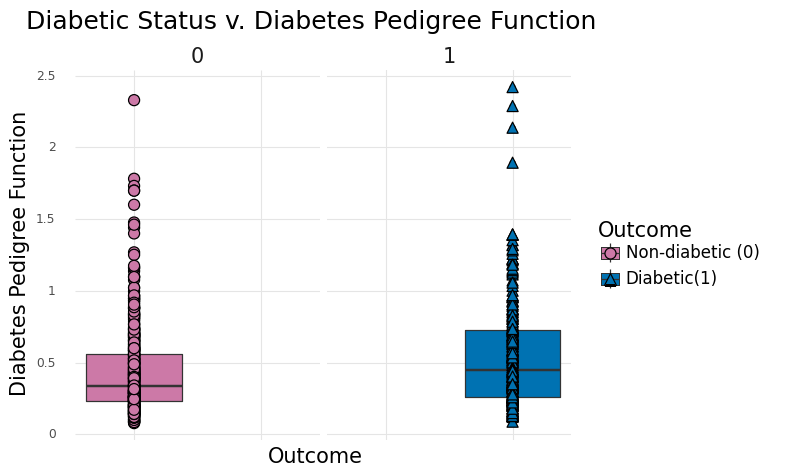

<ggplot: (8761571498605)>

In [159]:
#Visualization #1
(ggplot(diabetes_DF, aes(x = "Outcome", y = "DiabetesPedigreeFunction", fill = "factor(Outcome)"))+
geom_boxplot()+
geom_point(aes(shape = "factor(Outcome)"), size = 4)+
facet_wrap("~Outcome")+
 scale_x_continuous(breaks = [min(diabetes_DF.Outcome), max(diabetes_DF.Outcome)]) +
 ggtitle("Diabetic Status v. Diabetes Pedigree Function ") +
 theme_minimal()+
 theme(panel_grid_minor_y =element_blank(),
panel_grid_minor_x =element_blank(),
axis_title = element_text(size =15),
strip_text_x = element_text(size =15),
plot_title = element_text(size =18),
axis_text_x = element_blank(),
legend_title = element_text(size = 15),
legend_text = element_text(size = 12))+
labs(y= "Diabetes Pedigree Function")+
scale_shape_discrete(values = ["#cc79a7", "#0072b2"], name = "Outcome" ,labels = ("Non-diabetic (0)", "Diabetic(1)"))+
scale_fill_manual(values = ["#cc79a7", "#0072b2"],name ="Outcome", labels = ("Non-diabetic (0)", "Diabetic(1)")))

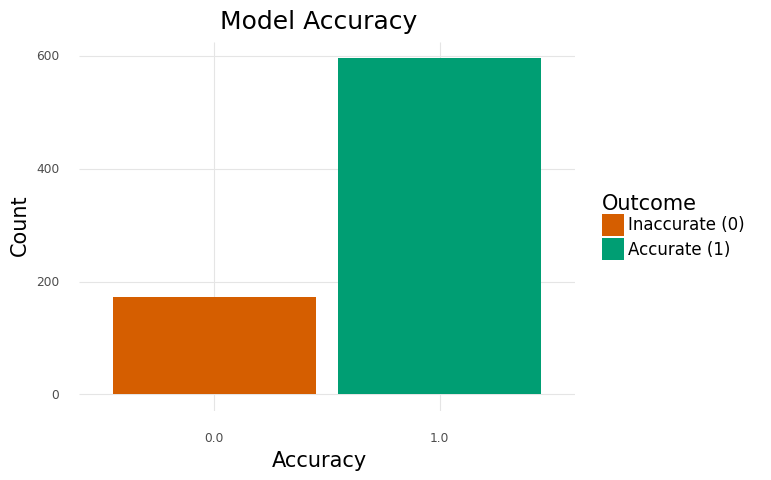

<ggplot: (8761574557141)>

In [160]:
#Visualization #2
(ggplot(acc_df, aes(x = "factor(acc)", fill = "factor(acc)")) 
 + geom_bar() 
 + ggtitle("Model Accuracy")
 + labs(x = "Accuracy", y = "Count")
 + theme_minimal()
 + theme(panel_grid_minor_y =element_blank(),
        panel_grid_minor_x =element_blank(),
        axis_title = element_text(size =15),
        strip_text_x = element_text(size =15),
        plot_title = element_text(size =18),
        legend_title = element_text(size = 15),
        legend_text = element_text(size = 12))
 +scale_fill_manual(values = ["#d55e00", "#009e73"],name ="Outcome", 
                    labels = ("Inaccurate (0)", "Accurate (1)")))

### Justification for Visualization Choices

I chose to create a boxplot to show the relationship between the Outcome (if someone is diabetic or not) with its strongest predictor which is Diabetes Pedigree Function. This graph shows that people with higher Diabetes Pedigree function on average are diabetic and those with a lower Diabetes Pedigree function is not diabetic. 

This bar graph shows the number of times the model was accuarate compared to the times it was inaccurate. This shows that there is a much larger amount of times that our model was correct in predicting if someone has diabetes or not based on all of the predictors. In all, this further supports the accuaracy score produced showing that the model is roughly 78% accurate in predicting if someone is diabetic or not.  

### Can Diabetes (measured in the Outcome column, 0 indicates no diabetes, 1 indicates diabetes diagnosis) be predicted using all the other variables in the dataset? 
Yes, diabetes can be predicted using all other variables in the dataset using a logistic regression model. 

### What are the relationships between our predictor variables and diabetes? 
Predictors such as Skin Thickness, BMI, Glucose, Age, Diabetes Pedigree Function, Pregnancies have a positive relationship with whether or not someone has diabetes. This means that if any of these predictors increase then the likelihood that the person has diabetes is higher. Blood pressure and insulin have a negative relationship with whether or not someone has diabetes. This means that if blood pressure or insulin increases then the chances of the person having diabetes decreases.

### Which variable has the largest effect on Diabetes diagnosis? 
Diabetes Pedigree Function has the largest effect on a diabetes diagnosis because it has the largest coefficient. A one standard deviation increase in Diabetes Pedigree Function means that the odds will be 4.133158 times the odds that it previously was.This relationship is shown in Visualizaton #1 which shows that on average people with higher Diabetes Pedigree Function have diabetes and those with lower Diabetes Pedigree Function don't have diabtes. 

### Will this model accurately predict Diabetes in other similar datasets?
Yes, this model should be fairly accurate in predicting diabetes on similar datasets because the model has an approximate 77.6042% accuracy. In Visualization #2 the exact amount of accurate and innacuate predictions the model generated is shown with a bar chart, which further supports the accuracy score that was generated by the accuracy function. However, I don't expect the results to be exactly the same because there is always some variation in the sample. 